In [1]:
import Merge_Cartesian 

from decimal import *
import math
import copy
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# This needs to be changed for your code
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\Jonathan\\Documents\\Academic\\Masters\\Simulator\\Git\\Main_Algorithm\\ffmpeg\\bin\\ffmpeg.exe'

In [2]:
from ipywidgets import IntProgress
from IPython.display import display

# Get Raw Wavefront Arrays

In [3]:
%matplotlib widget
L_Time = '13'
C_Time = '12'

L_impedance = '718'
C_impedance = '1.2'

number_periods = '1'

#  INDUCTANCE, CAPACITANCE, LENGTH
Inductor_List = [L_impedance,L_Time,'1']
Capacitor_List = [C_impedance,C_Time,'1']

# VOLTAGE, PERIODS, BUCK, LOAD
Circuit_List = ['1',number_periods,False,'12']

In [4]:
(Storage_Inductor_Completed, 
Storage_Capacitor_Completed,
Voltage_Inductor,
Current_Inductor,
Voltage_Capacitor,
Current_Capacitor,
Time,
Wavefronts_Sending_Inductor,
Wavefronts_Sending_Capacitor,
Wavefronts_Returning_Inductor,
Wavefronts_Returning_Capacitor
) = Merge_Cartesian.Process_Wavefronts(Inductor_List,Capacitor_List, Circuit_List)


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        4667.0
Inductor Capacitance Per Length :       0.009052924791086350974930362117
Inductor Length :                       1
Inductor Total Inductance :             4667.0
Inductor Total Capacitance :            0.009052924791086350974930362117
Inductor Velocity :                     0.1538461538461538461538461538
Inductor Time Delay :                   6.5
Inductor Impedance :                    718

- The Capacitor -
Capacitor Inductance Per Length :       7.2
Capacitor Capacitance Per Length :      5
Capacitor Length :                      1
Capacitor Total Inductance :            7.2
Capacitor Total Capacitance :           5
Capacitor Velocity :                    0.1666666666666666666666666667
Capacitor Time Delay :                  6
Capacitor Impedance :                   1.2

- The Time -
Number Periods :                        1
Simulation Stop Time :                  959.806686160188193

In [5]:
figure_number = 1

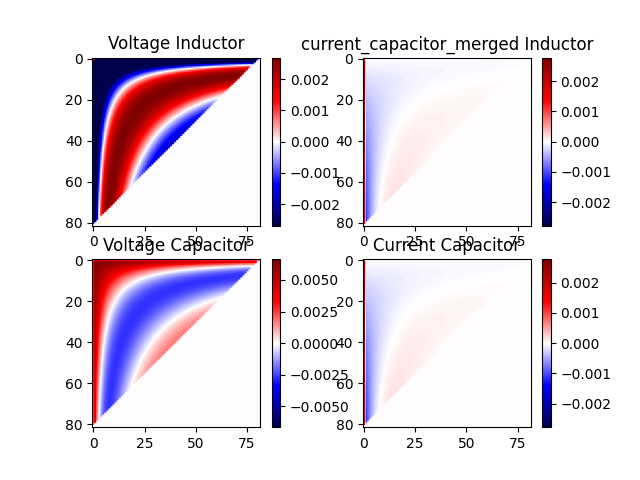

In [6]:
plt.figure(figure_number)
figure_number +=1

plt.subplot(2,2,1)
plt.title("Voltage Inductor")
Contrast = copy.copy(Voltage_Inductor.astype(np.float))
Contrast[0,0] = 0
max_boundary = np.max(Contrast)  

c = plt.imshow(Voltage_Inductor.astype(np.float),cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

plt.subplot(2,2,2)
plt.title("current_capacitor_merged Inductor")
max_boundary = np.max(Current_Inductor)  

c = plt.imshow(Current_Inductor.astype(np.float),cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

plt.subplot(2,2,3)
plt.title("Voltage Capacitor")
max_boundary = np.max(Voltage_Capacitor)  

c = plt.imshow(Voltage_Capacitor.astype(np.float),cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

plt.subplot(2,2,4)
plt.title("Current Capacitor")
max_boundary = np.max(Current_Capacitor)  

c = plt.imshow(Current_Capacitor.astype(np.float),cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Nx,Ny = Voltage_Capacitor.shape
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)

ax.plot_surface(X,Y,Voltage_Capacitor,cmap=cm.coolwarm)

# Trying to understand Fanout Frequency

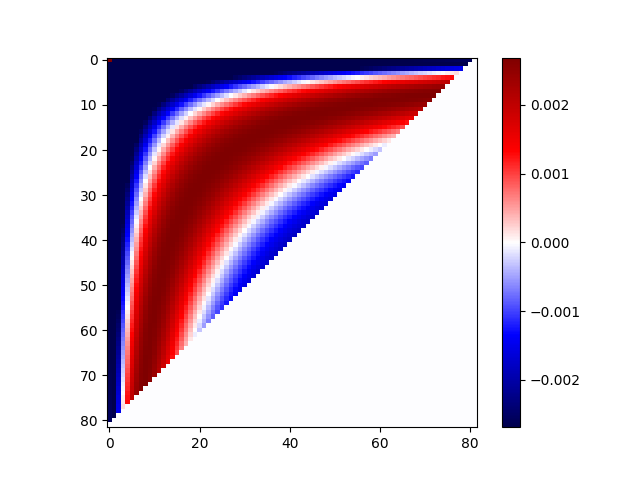

In [7]:
plt.figure(figure_number)
figure_number +=1

Contrast = copy.copy(Voltage_Inductor.astype(np.float))
Contrast[0,0] = 0
max_boundary = np.max(Contrast)  
c = plt.imshow(Voltage_Inductor.astype(np.float),cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

In [8]:
figure_number += 1

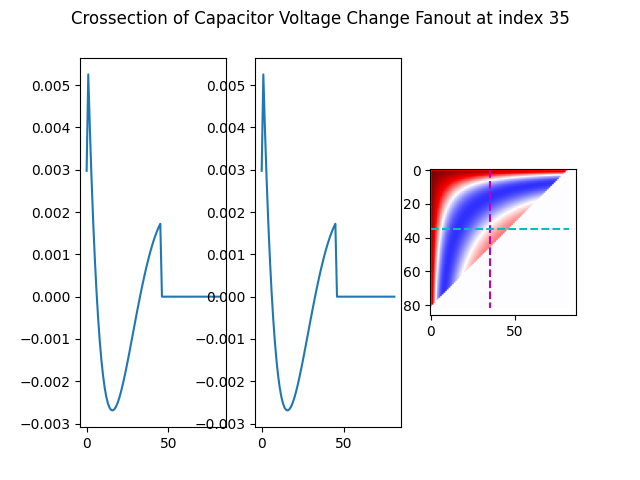

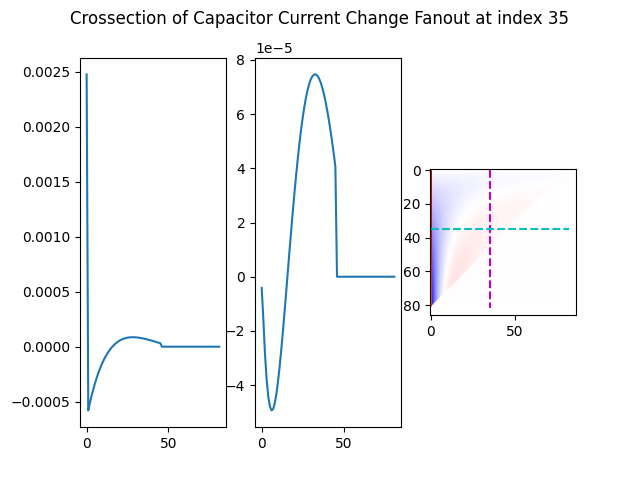

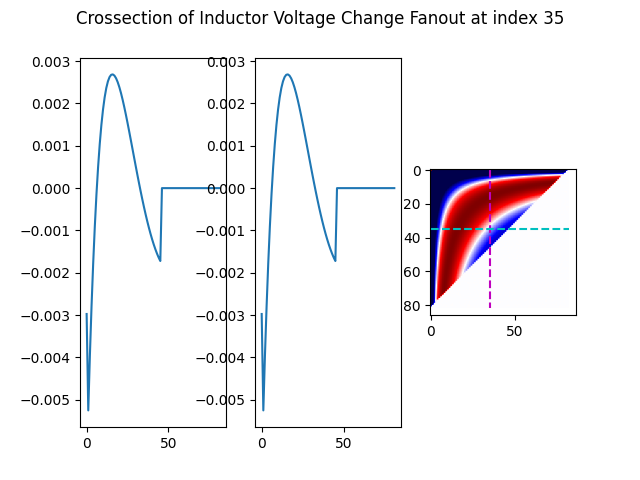

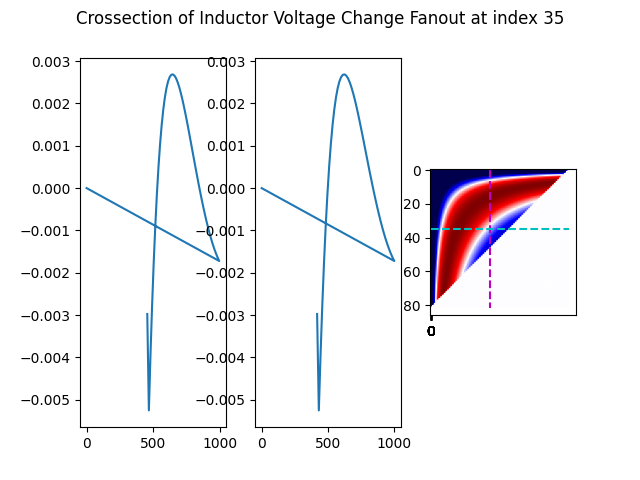

In [9]:
row_number = 35

fig, ax = plt.subplots(1,3)


fig.suptitle("Crossection of Capacitor Voltage Change Fanout at index " + str(row_number) )

row = Voltage_Capacitor[row_number,:]
time = Time[row_number,:]
# plt.xticks(time)
ax[0].plot(row)

row = Voltage_Capacitor[:,row_number]
ax[1].plot(row)

Contrast = copy.copy(Voltage_Capacitor.astype(np.float))
Contrast[0] = 0
max_boundary = np.max(Contrast)  
c = ax[2].imshow(Voltage_Capacitor.astype(np.float),cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
# along Inductor
ax[2].plot([row_number,row_number],[0,Voltage_Capacitor.shape[0]],'m--')
# along Inductor
ax[2].plot([0,Voltage_Capacitor.shape[0]],[row_number,row_number],'c--')



fig_2, ax_2 = plt.subplots(1,3)
fig_2.suptitle("Crossection of Capacitor Current Change Fanout at index " + str(row_number) )

row = Current_Capacitor[row_number,:]
time = Time[row_number,:]
# plt.xticks(time)
ax_2[0].plot(row)

row = Current_Capacitor[:,row_number]
ax_2[1].plot(row)

Contrast = copy.copy(Current_Capacitor.astype(np.float))
Contrast[0] = 0
max_boundary = np.max(Contrast)  
c = ax_2[2].imshow(Current_Capacitor.astype(np.float),cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
# along Inductor
ax_2[2].plot([row_number,row_number],[0,Current_Capacitor.shape[0]],'m--')
# along Inductor
ax_2[2].plot([0,Current_Capacitor.shape[0]],[row_number,row_number],'c--')



f_cross, ax_cross = plt.subplots(1,3)
f_cross.suptitle("Crossection of Inductor Voltage Change Fanout at index " + str(row_number) )

row = Voltage_Inductor[row_number,:]
time = Time[row_number,:]
# plt.xticks(time)
ax_cross[0].plot(row)

row = Voltage_Inductor[:,row_number]
ax_cross[1].plot(row)

Contrast = copy.copy(Voltage_Inductor.astype(np.float))
Contrast[0,0] = 0
max_boundary = np.max(Contrast)  
c = ax_cross[2].imshow(Voltage_Inductor.astype(np.float),cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
# along Inductor
ax_cross[2].plot([row_number,row_number],[0,Voltage_Inductor.shape[0]],'m--')
# along Inductor
ax_cross[2].plot([0,Voltage_Inductor.shape[0]],[row_number,row_number],'c--')




f_cross_2, ax_cross_2 = plt.subplots(1,3)
f_cross_2.suptitle("Crossection of Inductor Voltage Change Fanout at index " + str(row_number) )

row = Voltage_Inductor[row_number,:]
time = Time[row_number,:]
plt.xticks(time)
ax_cross_2[0].plot(time,row)

row = Voltage_Inductor[:,row_number]
time = Time[:,row_number]
ax_cross_2[1].plot(time,row)

Contrast = copy.copy(Voltage_Inductor.astype(np.float))
Contrast[0,0] = 0
max_boundary = np.max(Contrast)  
c = ax_cross_2[2].imshow(Voltage_Inductor.astype(np.float),cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
# along Inductor
ax_cross_2[2].plot([row_number,row_number],[0,Voltage_Inductor.shape[0]],'m--')
# along Inductor
ax_cross_2[2].plot([0,Voltage_Inductor.shape[0]],[row_number,row_number],'c--')


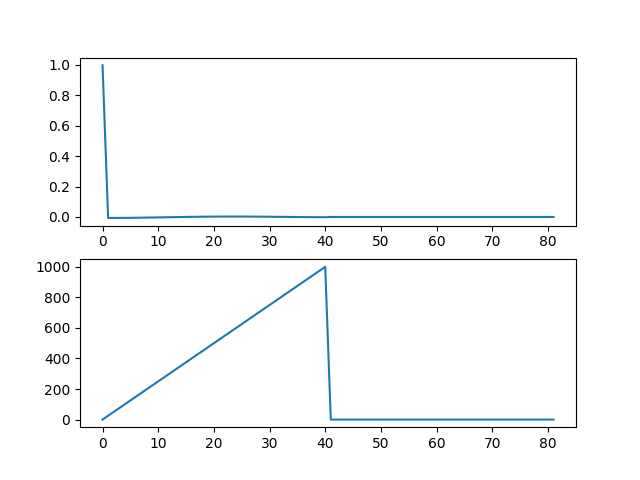

In [10]:
plt.figure()

plt.subplot(2,1,1)
row = Voltage_Inductor.diagonal()
plt.plot(row)


plt.subplot(2,1,2)
row = Time.diagonal()
plt.plot(row)

# Higher Order Merging

## Demonstrating co-factors and LCM -> array index 

In [11]:
Merge_Cartesian.LCM

Decimal('156.0')

In [12]:
Merge_Cartesian.GCD

Decimal('1')

In [13]:
Merge_Cartesian.Inductor_LCM_Factor

12

In [14]:
Merge_Cartesian.Capacitor_LCM_Factor

13

In [15]:
a = Merge_Cartesian.Inductor_LCM_Factor
b = Merge_Cartesian.Capacitor_LCM_Factor

In [16]:
if(Merge_Cartesian.is_Higher_Merging):
    print(Time[a,0])

156.0


In [17]:
if(Merge_Cartesian.is_Higher_Merging):
    print(Time[0,b])

156


## Functions for routine

In [18]:
def make_upper_and_lower(arr,b_factor):
    upper = arr[:,0:b_factor]
    lower = arr[:,b_factor:]
    
    padding_for_upper = np.full(lower.shape,0,dtype=lower.dtype)
    padding_for_lower = np.full(upper.shape,0,dtype=upper.dtype)
    
    upper= np.append(upper,padding_for_upper,axis=1)
    lower= np.append(lower,padding_for_lower,axis=1)
    
    return upper,lower

In [19]:
def shif_and_pad_array_x(arr,number_lines):
    
    rolled_arr = np.roll(arr, number_lines, axis=0)
    
    left_arr = rolled_arr[0:number_lines,:]
    left_arr = np.full(left_arr.shape,0,dtype=left_arr.dtype)
    
    
    rolled_arr= np.delete(rolled_arr,np.arange(0,number_lines,1),axis=0)
    rolled_arr = np.append(left_arr,rolled_arr,axis=0)
    
    return rolled_arr

In [20]:
def multiplicative_merge_cycle(arr,a_factor,b_factor):
    upper_arr,lower_arr = make_upper_and_lower(arr,b_factor)
    arr_merge_ready = shif_and_pad_array_x(lower_arr,a_factor)
    
    arr_merged = upper_arr + arr_merge_ready
    
    return arr_merged

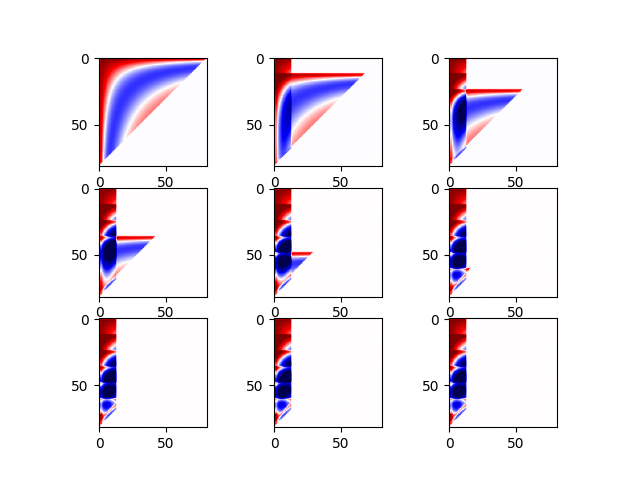

In [21]:
if(Merge_Cartesian.is_Higher_Merging):

    fig_merge,ax_merge = plt.subplots(3,3)

    # First Row
    c = ax_merge[0,0].imshow(Voltage_Capacitor.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[0,0])

    voltage_capacitor_merged = multiplicative_merge_cycle(Voltage_Capacitor,a,b)

    c = ax_merge[0,1].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[0,1])

    voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

    c = ax_merge[0,2].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[0,2])




    # Second Row
    voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

    c = ax_merge[1,0].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[1,0])

    voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

    c = ax_merge[1,1].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[1,1])

    voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

    c = ax_merge[1,2].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[1,2])




    # Third Row
    voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

    c = ax_merge[2,0].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[2,0])

    voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

    c = ax_merge[2,1].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[2,1])

    voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

    c = ax_merge[2,2].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[2,2])

In [22]:
def multiplicative_merging(arr,a,b,number_of_layers):
    
    number_merge_cycles = math.ceil(number_of_layers/b) + 1
    
    for _ in range (0,number_merge_cycles):
        arr = multiplicative_merge_cycle(arr,a,b)

    return arr[:,0:b]

In [23]:
if(Merge_Cartesian.is_Higher_Merging):
    voltage_inductor_merged = multiplicative_merging(Voltage_Inductor,a,b,Merge_Cartesian.Number_of_Layers)
    current_inductor_merged = multiplicative_merging(Current_Inductor,a,b,Merge_Cartesian.Number_of_Layers)
    voltage_capacitor_merged = multiplicative_merging(Voltage_Capacitor,a,b,Merge_Cartesian.Number_of_Layers)
    current_capacitor_merged = multiplicative_merging(Current_Capacitor,a,b,Merge_Cartesian.Number_of_Layers)
    
    Wavefronts_Sending_Inductor_merged = multiplicative_merging (Wavefronts_Sending_Inductor,a,b,Merge_Cartesian.Number_of_Layers)
    Wavefronts_Sending_Capacitor_merged = multiplicative_merging (Wavefronts_Sending_Capacitor,a,b,Merge_Cartesian.Number_of_Layers)
    
    Wavefronts_Returning_Inductor_merged = multiplicative_merging (Wavefronts_Returning_Inductor,a,b,Merge_Cartesian.Number_of_Layers)
    Wavefronts_Returning_Capacitor_merged = multiplicative_merging (Wavefronts_Returning_Capacitor,a,b,Merge_Cartesian.Number_of_Layers)
else:
    voltage_inductor_merged = Voltage_Inductor
    current_inductor_merged = Current_Inductor
    voltage_capacitor_merged = Voltage_Capacitor
    current_capacitor_merged = Current_Capacitor
    
    Wavefronts_Sending_Inductor_merged = Wavefronts_Sending_Inductor
    Wavefronts_Sending_Capacitor_merged = Wavefronts_Sending_Capacitor
    
    Wavefronts_Returning_Inductor_merged = Wavefronts_Returning_Inductor
    Wavefronts_Returning_Capacitor_merged = Wavefronts_Returning_Capacitor

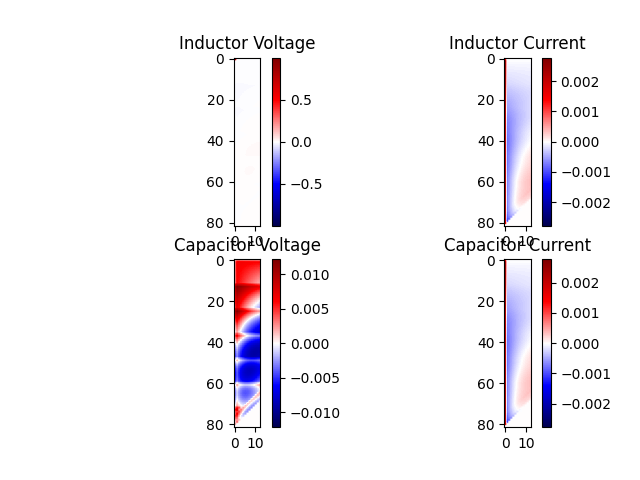

In [24]:
plt.figure()

plt.subplot(2,2,1)
plt.title("Inductor Voltage")
c = plt.imshow(voltage_inductor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_inductor_merged), vmin = - np.max(voltage_inductor_merged))
plt.colorbar(c)


plt.subplot(2,2,2)
plt.title("Inductor Current")
c = plt.imshow(current_inductor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(current_inductor_merged), vmin = - np.max(current_inductor_merged))
plt.colorbar(c)

plt.subplot(2,2,3)
plt.title("Capacitor Voltage")
c = plt.imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_capacitor_merged), vmin = - np.max(voltage_capacitor_merged))
plt.colorbar(c)

plt.subplot(2,2,4)
plt.title("Capacitor Current")
c = plt.imshow(current_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(current_capacitor_merged), vmin = - np.max(current_capacitor_merged))
plt.colorbar(c)


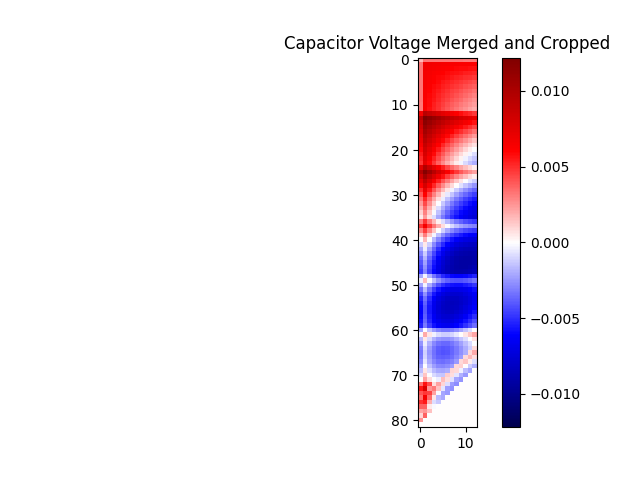

In [25]:
figclvmt,axclvmt =plt.subplots()

plt.title("Capacitor Voltage Merged and Cropped")
c = plt.imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_capacitor_merged), vmin = - np.max(voltage_capacitor_merged))
plt.colorbar(c)

## Follow Options Ordering

In [26]:
# Ordering Wavefronts

latest_time = 0

x_index = 0
y_index = 0

option_time = []
option_indexes =[]

out_time = []
out_indexes = []
out_voltage = []
out_current = []

Time_Merged = Time[:,0:Merge_Cartesian.b]
Marked = np.zeros(Time.shape,dtype=Time.dtype)

def store_options(input_arr,x,y,magnitude,indexes):
    x_size,y_size = input_arr.shape
    
    
    if(x+1 < x_size and Marked[x+1,y] == 0):
        
        option_a = input_arr[x+1,y]
        magnitude.append(option_a)
        indexes.append([x+1,y])
        Marked[x+1,y] = 1
    
    if(y+1 < y_size and Marked[x,y+1] == 0):
        
        option_b = input_arr[x,y+1]
        magnitude.append(option_b)
        indexes.append([x,y+1])
        Marked[x,y+1] = 1
    
def get_best_option_value_index(opt_arr,opt_indexes):
    opt_index_min = np.argmin(opt_arr)
    
    value = opt_arr[opt_index_min]
    del opt_arr[opt_index_min]
    
    index = opt_indexes[opt_index_min]
    del opt_indexes[opt_index_min]
    
    return value, index


# Store Initial Point
out_time.append(Time_Merged[0,0])
out_indexes.append([0,0])
out_voltage.append(voltage_capacitor_merged[0,0])
out_current.append(current_capacitor_merged[0,0])
Marked[0,0] = 1

while latest_time < Merge_Cartesian.Simulation_Stop_Time:
    
    # store options at location
    store_options(Time_Merged,x_index,y_index,option_time,option_indexes)
    
    
    if(len(option_time) > 0):
        # get best option
        best_time, best_time_index = get_best_option_value_index(option_time,option_indexes)
        
        out_time.append(best_time)
        out_indexes.append(best_time_index)
        
        out_voltage.append(voltage_capacitor_merged[best_time_index[0],best_time_index[1]] )
        out_current.append(current_capacitor_merged[best_time_index[0],best_time_index[1]] )
        
        Marked[best_time_index[0],best_time_index[1]]  = 2
    
    latest_time = best_time
    x_index, y_index = best_time_index

In [27]:
# voltage_capacitor_merged = voltage_capacitor_merged [0:out_indexes[-1][0],:]
# current_capacitor_merged = current_capacitor_merged [0:out_indexes[-1][0],:]

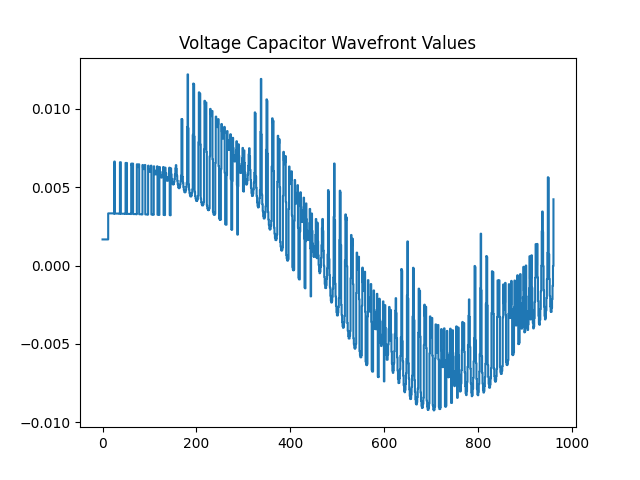

In [28]:
fig_series_voltage,ax_series_voltage =plt.subplots()

plt.title("Voltage Capacitor Wavefront Values")
plt.step(out_time,out_voltage,where='post')


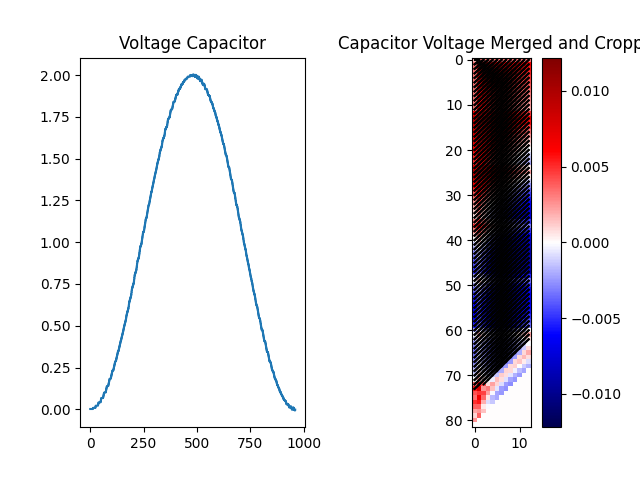

In [29]:
integrated_voltage = np.cumsum(out_voltage)  
plt.figure()

plt.subplot(1,2,1)
plt.title("Voltage Capacitor")
plt.step(out_time,integrated_voltage,where='post')

plt.subplot(1,2,2)
plt.title("Capacitor Voltage Merged and Cropped")

c = plt.imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_capacitor_merged), vmin = - np.max(voltage_capacitor_merged))
plt.colorbar(c)

for i,index in enumerate(out_indexes):
    if(i  == 0):
        pass
    else:
        x1 = out_indexes[i-1][0]
        y1 = out_indexes[i-1][1]
        
        x2 = index[0]
        y2 = index[1]
        plt.plot([y1,y2],[x1,x2],'black')
    
    

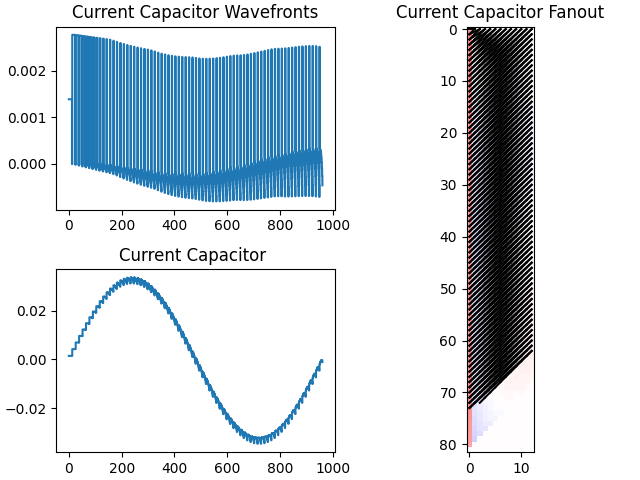

In [30]:
integrated_current = np.cumsum(out_current)  
ax = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AC
    BC
    """
)

ax["A"].set_title("Current Capacitor Wavefronts")
ax["A"].step(out_time,out_current,where='post')


ax["B"].set_title("Current Capacitor ")
ax["B"].step(out_time,integrated_current,where='post')

ax["C"].set_title("Current Capacitor Fanout")
c = ax["C"].imshow(current_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_capacitor_merged), vmin = - np.max(voltage_capacitor_merged))
# plt.colorbar(c,ax = ax["C"])

for i,index in enumerate(out_indexes):
    if(i  == 0):
        pass
    else:
        x1 = out_indexes[i-1][0]
        y1 = out_indexes[i-1][1]
        
        x2 = index[0]
        y2 = index[1]
        ax["C"].plot([y1,y2],[x1,x2],'black')


# Wavefront Positions at Time

In [56]:
def plot_spatial_at_time(time_enquirey, Sending_Wavefronts, Returning_Wavefronts,fig_spatial,ax_spatial ,title_str):
    
    
    termination_length = 1
     
    if (type(time_enquirey) != Decimal):
            raise TypeError("Time must me Decimal")
    
    if("Capacitor".lower() in title_str.lower()):
        termination_length = Merge_Cartesian.Capacitor_Length
    elif("Inductor".lower() in title_str.lower()):
        termination_length = Merge_Cartesian.Inductor_Length
    else:
        raise RuntimeWarning("Name your plots correctly, assuming length to be 1")
    
    
    ax_spatial[0].cla()
    ax_spatial[1].cla()
     
    dc_voltage = 0
    dc_current = 0

    send_position = []
    send_value_voltage = []
    send_value_current = []

    return_position = []
    return_value_voltage = []
    return_value_current = []

    for index in out_indexes:
        x = index[0]
        y = index[1]
        
        sending_wavefront = Sending_Wavefronts[x,y]
        returning_wavefront = Returning_Wavefronts[x,y]
        
        if(sending_wavefront.time_start > time_enquirey): # Finished
            break
        
        elif(returning_wavefront.time_end <= time_enquirey): # Both DC
            dc_voltage += sending_wavefront.magnitude_voltage
            dc_current += sending_wavefront.magnitude_current
            
            dc_voltage += returning_wavefront.magnitude_voltage
            dc_current += returning_wavefront.magnitude_current
            
        elif(returning_wavefront.time_end >= time_enquirey and returning_wavefront.time_start < time_enquirey): # Returning Intercept, Sending DC
            return_position.append(returning_wavefront.Position_at_time(time_enquirey))
            return_value_voltage.append(returning_wavefront.magnitude_voltage)
            return_value_current.append(returning_wavefront.magnitude_current)
            
            dc_voltage += sending_wavefront.magnitude_voltage
            dc_current += sending_wavefront.magnitude_current
            
        elif(sending_wavefront.time_end >= time_enquirey and sending_wavefront.time_start <= time_enquirey): # Sending Intercept
            
            send_position.append(sending_wavefront.Position_at_time(time_enquirey))
            send_value_voltage.append(sending_wavefront.magnitude_voltage)
            send_value_current.append(sending_wavefront.magnitude_current)
            
        else:
            raise Exception("Somethings wrong, wavefront has to be intecepted/ stored or done")
        
    termination_value_voltage = dc_voltage
    interconnect_value_voltage =  dc_voltage
    
    termination_value_current = dc_current
    interconnect_value_current =  dc_current

    position_all = []
    value_left_voltage = []
    value_right_voltage = []
    
    value_left_current = []
    value_right_current = []

    # input sending values in output form, make all DC value
    for i, pos in enumerate(send_position):
        position_all.append(pos)
        
        value_left_voltage.append(dc_voltage)
        value_right_voltage.append(dc_voltage)
        interconnect_value_voltage += send_value_voltage[i]
        
        value_left_current.append(dc_current)
        value_right_current.append(dc_current)
        interconnect_value_current += send_value_current[i]
        
        if (pos ==Merge_Cartesian.Capacitor_Length):
            pass
            # raise Exception("Sending wavefront at termination, problematic")

    # input returning values in output form, make all DC value
    for i, pos in enumerate(return_position):
        position_all.append(pos)
        
        value_left_voltage.append(dc_voltage)
        value_right_voltage.append(dc_voltage)
        termination_value_voltage += return_value_voltage[i]
        
        value_left_current.append(dc_current)
        value_right_current.append(dc_current)
        
        termination_value_current += return_value_current[i]
        
        if (pos ==0):
            pass
            # raise Exception("Returning wavefront at interconnect, problematic")

    # add values left and right
    for i,position in enumerate(position_all):
        
        for j, send_pos in enumerate(send_position):
            if(send_pos> position):
                value_left_voltage[i] += send_value_voltage[j]
                value_right_voltage[i] += send_value_voltage[j]
                
                value_left_current[i] += send_value_current[j]
                value_right_current[i] += send_value_current[j]
                
            if (send_pos == position ):
                value_left_voltage[i] += send_value_voltage[j]
                
                value_left_current[i] += send_value_current[j]
            
        for j, return_pos in enumerate(return_position):
            if(return_pos< position):
                value_left_voltage[i] += return_value_voltage[j]
                value_right_voltage[i] += return_value_voltage[j]
                
                value_left_current[i] += return_value_current[j]
                value_right_current[i] += return_value_current[j]
                
            if (return_pos == position ):
                value_right_voltage[i] += return_value_voltage[j]
                
                value_right_current[i] += return_value_current[j]
            
    # append interconnect
    position_all.append(0)
    
    value_left_voltage.append(interconnect_value_voltage)
    value_right_voltage.append(interconnect_value_voltage)
    
    value_left_current.append(interconnect_value_current)
    value_right_current.append(interconnect_value_current)

    # append termination
    position_all.append(termination_length)
        
    value_left_voltage.append(termination_value_voltage)
    value_right_voltage.append(termination_value_voltage)
    
    value_left_current.append(termination_value_current)
    value_right_current.append(termination_value_current)

    zip_positions_voltage_current = sorted(zip(position_all,value_left_voltage,value_right_voltage,value_left_current,value_right_current))
    position_all,value_left_voltage,value_right_voltage,value_left_current,value_right_current = zip(*zip_positions_voltage_current)

    # Create Plot

    fig_spatial.suptitle(title_str + str(time_enquirey.quantize(Decimal('.0001'), rounding=ROUND_HALF_DOWN)) + "s")
    
    ax_spatial[0].set_title("Voltage")
    ax_spatial[1].set_title("Current")

    x = 0
    x_old = 0
    
    
    y1_voltage = 0
    y2_voltage = 0
    y_voltage_old = value_left_voltage[0]
    
    y1_current = 0
    y2_current = 0
    y_current_old = value_left_current[0]
    
    
    ax_spatial[0].plot([0,0],[0,y_voltage_old],'k--')
    ax_spatial[1].plot([0,0],[0,y_current_old],'k--')

    for position, left_voltage, right_voltage, left_current, right_current in zip_positions_voltage_current:
        x = position
        
        y1_voltage = left_voltage
        y2_voltage = right_voltage
        
        y1_current = left_current
        y2_current = right_current
        
        ax_spatial[0].plot([x_old,x], [y_voltage_old,y1_voltage],'k-')
        ax_spatial[0].plot([x,x] ,   [y1_voltage,y2_voltage])
        
        ax_spatial[1].plot([x_old,x], [y_current_old,y1_current],'k-')
        ax_spatial[1].plot([x,x],    [y1_current,y2_current])
        
        x_old = x
        
        y_voltage_old = y2_voltage
        y_current_old = y2_current
        
    
    ax_spatial[0].plot([termination_length,termination_length],[0,y_voltage_old],'k--')
    ax_spatial[1].plot([termination_length,termination_length],[0,y_current_old],'k--')

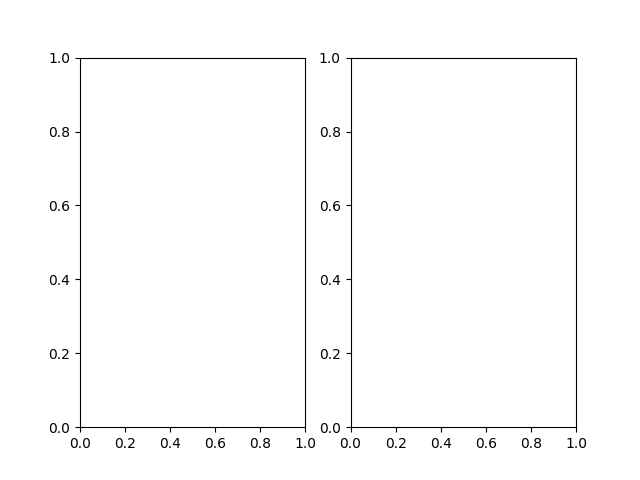

In [32]:
fig_s,ax_s = plt.subplots(1,2)


In [57]:
plot_spatial_at_time(Decimal('90.000001'),Wavefronts_Sending_Inductor_merged,Wavefronts_Returning_Inductor_merged,fig_s,ax_s,"Spatial Voltage Accumulation in Capacitor at time ")

In [47]:
fps = Decimal('15')
time_start = Decimal('0')
time_end = Decimal('300')
total_video_time = Decimal('60')

number_frames =  total_video_time*fps
time_increment = (time_end - time_start)/number_frames

metadata = dict(title='Distributed Modelling', artist='Jonathan Meerholz')
writer = FFMpegWriter(fps=float(fps), metadata=metadata)

ProgressBar = IntProgress(min=0, max=int(number_frames)) # instantiate the bar
display(ProgressBar)
ProgressBar.value = 0

IntProgress(value=0, max=900)

In [48]:
time = time_start
ProgressBar.value = 0
with writer.saving(fig_s, "Voltage_Capacitor_Test.mp4", 100):
    
    for _ in range(0,int(number_frames)):
        
        plot_spatial_at_time(time,Wavefronts_Sending_Capacitor_merged,Wavefronts_Returning_Capacitor_merged,fig_s,ax_s,"Spatial Voltage Accumulation in Capacitor at time ")
        writer.grab_frame()
        time += time_increment
        ProgressBar.value +=1

In [58]:
time = time_start
ProgressBar.value = 0
with writer.saving(fig_s, "Inductor_Test.mp4", 100):
    
    for _ in range(0,int(number_frames)):
        
        plot_spatial_at_time(time,Wavefronts_Sending_Inductor_merged,Wavefronts_Returning_Inductor_merged,fig_s,ax_s,"Spatial Inductor wavefroms at time ")
        writer.grab_frame()
        time += time_increment
        ProgressBar.value +=1

## Gradient Follow

In [35]:
A = Decimal(L_Time)
B = Decimal(C_Time)

LCM , GCF = Merge_Cartesian.lcm_gcd(A,B)

a = int((B)/(GCF))
b = int((A)/(GCF))

A_to_B_x = 0
A_to_B_y = 0

for  y in range(1,Merge_Cartesian.Number_of_Wavefronts):
    
    if( (y*B - GCF )%A == 0):
        A_to_B_x = (y*B - GCF)/A
        A_to_B_y = y
        break
    
    if(y == Merge_Cartesian.Number_of_Wavefronts -1):
        print('Eish')
        

B_to_A_x = 0
B_to_A_y = 0

for  y in range(1,Merge_Cartesian.Number_of_Wavefronts):
    
    if( (y*B + GCF )%A == 0):
        B_to_A_x = (y*B + GCF)/A
        B_to_A_y = y
        break
    
    if(y == Merge_Cartesian.Number_of_Wavefronts -1):
        print('Eish')

print('A :',A)
print('B :',B)
print('GCF :',GCF)
print('LCM :',LCM)
print('a :',a)
print('b :',b)
print('A_to_B_x : ' + str(A_to_B_x))
print('A_to_B_y : ' + str(A_to_B_y))
print('B_to_A_x : ' + str(B_to_A_x))
print('B_to_A_y : ' + str(B_to_A_y))

A : 13
B : 12
GCF : 1
LCM : 156
a : 12
b : 13
A_to_B_x : 11
A_to_B_y : 12
B_to_A_x : 1
B_to_A_y : 1


In [36]:
Merge_Cartesian.Number_of_Wavefronts

13284